### Importation des libs 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Chargement des données 

In [44]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv("/content/drive/MyDrive/Data/dataFlight.csv", encoding='ISO-8859-1', error_bad_lines=False,delimiter=',')
data.head(2).append(data.tail(2))

<ipython-input-44-d0cadd97b9dd>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("/content/drive/MyDrive/Data/dataFlight.csv", encoding='ISO-8859-1', error_bad_lines=False,delimiter=',')
<ipython-input-44-d0cadd97b9dd>:4: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Data/dataFlight.csv", encoding='ISO-8859-1', error_bad_lines=False,delimiter=',')
<ipython-input-44-d0cadd97b9dd>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data.head(2).append(data.tail(2))


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,675,13487,1348701,31650,MSP,"Minneapolis, MN",MN,27.0,Minnesota,63,14869,1486902,34614,SLC,"Salt Lake City, UT",UT,49.0,Utah,87,1640,1659.0,19.0,19.0,1.0,1.0,1600-1659,24.0,1723.0,1856.0,3.0,1836,1859.0,23.0,23.0,1.0,1.0,1800-1859,0.0,NaN,0.0,176.0,180.0,153.0,1.0,991.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,671,13342,1334202,33342,MKE,"Milwaukee, WI",WI,55.0,Wisconsin,45,13204,1320401,31454,MCO,"Orlando, FL",FL,12.0,Florida,33,1204,1202.0,-2.0,0.0,0.0,-1.0,1200-1259,10.0,1212.0,1533.0,8.0,1541,1541.0,0.0,0.0,0.0,0.0,1500-1559,0.0,NaN,0.0,157.0,159.0,141.0,1.0,1066.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999998,2012,2,5,15,2,2012-05-15,WN,19393,WN,N281WN,536,13232,1323202,30977,MDW,"Chicago, IL",IL,17.0,Illinois,41,10693,1069302,30693,BNA,"Nashville, TN",TN,47.0,Tennessee,54,1830,1838.0,8.0,8.0,0.0,0.0,1800-1859,8.0,1846.0,1942.0,5.0,1950,1947.0,-3.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,80.0,69.0,56.0,1.0,395.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999999,2003,2,4,29,2,2003-04-29,UA,19977,UA,N364UA,1241,12264,1226401,30852,IAD,"Washington, DC",VA,51.0,Virginia,38,13930,1393001,30977,ORD,"Chicago, IL",IL,17.0,Illinois,41,1615,1610.0,-5.0,0.0,0.0,-1.0,1600-1659,15.0,1625.0,1659.0,11.0,1724,1710.0,-14.0,0.0,0.0,-1.0,1700-1759,0.0,NaN,0.0,129.0,120.0,94.0,1.0,589.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data.shape

(2000000, 109)

Il s'agit d'un jeux de données assez important, on va donc examiner en détail chaque caractéristique, les valeurs manquantes et tout ce qui ne sera pas utile pour le projet et qui peut être supprimé.

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Columns: 109 entries, Year to Div5TailNum
dtypes: float64(72), int64(18), object(19)
memory usage: 1.6+ GB


# Glossaire

<b>Year</b> = Year of the Flight<br>
<b>Quarter</b> = Quarter of the Flight<br>
<b>Month</b> = Month of the Flight<br>
<b>DayofMonth</b> = Day of the Flight<br>
<b>DayOfWeek</b> = Quarter of the Flight<br>

<b>Reporting_Airline</b> = Airline Identifier<br>
<b>OP_CARRIER_FL_NUM</b> = Flight Number<br>
<b>ORIGIN</b> = Starting Airport Code<br>
<b>DEST</b> = Destination Airport Code<br>
<b>CRS_DEP_TIME</b> = Planned Departure Time<br>
<b>DEP_TIME</b> = Actual Departure Time<br>
<b>DEP_DELAY</b> = Total Delay on Departure in minutes<br>
<b>TAXI_OUT</b> = The time duration elapsed between departure from the origin airport gate and wheels off<br>
<b>WHEELS_OFF</b> = The time point that the aircraft's wheels leave the ground<br>
<b>WHEELS_ON</b> = The time point that the aircraft'ss wheels touch on the ground<br>
<b>TAXI_IN</b> = The time duration elapsed between wheels-on and gate arrival at the destination airport<br>
<b>CRS_ARR_TIME</b> = Planned arrival time<br>
<b>ARR_TIME</b> = Actual Arrival Time = ARRIVAL_TIME - SCHEDULED_ARRIVAL<br>
<b>ARR_DELAY</b> = Total Delay on Arrival in minutes<br>
<b>CANCELLED</b> = Flight Cancelled (1 = cancelled)<br>
<b>CANCELLATION_CODE</b> = Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security<br>
<b>DIVERTED</b> = Aircraft landed on different airport that the one scheduled<br>
<b>CRS_ELAPSED_TIME</b> = Planned time amount needed for the flight trip<br>
<b>ACTUAL_ELAPSED_TIME</b> = AIR_TIME+TAXI_IN+TAXI_OUT<br>
<b>AIR_TIME</b> = The time duration between wheels_off and wheels_on time<br>
<b>DISTANCE</b> = Distance between two airports<br>
<b>CARRIER_DELAY</b> = Delay caused by the airline in minutes<br>
<b>WEATHER_DELAY</b> = Delay caused by weather<br>
<b>NAS_DELAY</b> = Delay caused by air system<br>
<b>SECURITY_DELAY</b> = caused by security reasons<br>
<b>LATE_AIRCRAFT_DELAY</b> = Delay caused by security<br>

Source: <a href="https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018/version/1?select=2009.csv">Kaggle</a>

________________________________________________________________

La familiarisation rapide précédente nous a permis d'obtenir les informations suivantes, qui nous serviront de guide pour commencer à utiliser l'EDA.

### Choix des colonnes

Priorities:

* Définir ce que je considère comme un <b>vol retardé</b>

* Renommer les abréviations des compagnies aériennes (colonne x) avec leur nom d'origine

* Renommer les aéroports (ORIGIN et DEST) avec les noms de ville originaux 

* Supprimer toute colonne non pertinente

Colonnes à étudier :

* OP_CARRIER_FL_NUM (est-il nécessaire alors que nous avons l'OP_CARRIER ?)
* ANNULÉ 
* CODE D'ANNULATION 
* DIVERTED
* CRS_ELAPSEP_TIME
* DISTANCE
* CARRIER_DELAY
* WEATHER_DELAY
* NAS_DELAY
* SECURITY_DELAY
* RETARD DE L'AVION EN RETARD

Ce qu'il faut voir :

* Les parties des Etats-Unis avec le plus grand nombre de vols retardés.
* Les données sont-elles correctement équilibrées ? Il est très probable qu'elles ne le soient pas, et on devra donc s'en occuper.
* S'agit-il d'un problème de classification binaire ou multiple ?

In [47]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
column_list = list(data.columns)

# print the list of column names
print(len(column_list))
print(column_list)

109
['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'FirstDepTime', 'TotalAddGT

In [48]:
data = data.loc[:, ['Year','Quarter','Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Flight_Number_Reporting_Airline',
'Origin', 'OriginCityName', 'OriginState', 'OriginStateName', 'Dest', 'DestCityName', 'DestState', 'DestStateName', 'DestWac',
'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'Cancelled',
'Diverted', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1998,1,1,2,5,1998-01-02,NW,675,MSP,"Minneapolis, MN",MN,Minnesota,SLC,"Salt Lake City, UT",UT,Utah,87,1640,1659.0,19.0,19.0,1836,1859.0,23.0,23.0,0.0,0.0,1.0,991.0,4,NaN,NaN,NaN,NaN,NaN
1,2009,2,5,28,4,2009-05-28,FL,671,MKE,"Milwaukee, WI",WI,Wisconsin,MCO,"Orlando, FL",FL,Florida,33,1204,1202.0,-2.0,0.0,1541,1541.0,0.0,0.0,0.0,0.0,1.0,1066.0,5,NaN,NaN,NaN,NaN,NaN
2,2013,2,6,29,6,2013-06-29,MQ,3297,GJT,"Grand Junction, CO",CO,Colorado,DFW,"Dallas/Fort Worth, TX",TX,Texas,74,1630,1644.0,14.0,14.0,1945,1942.0,-3.0,0.0,0.0,0.0,1.0,773.0,4,NaN,NaN,NaN,NaN,NaN
3,2010,3,8,31,2,2010-08-31,DL,1806,LAX,"Los Angeles, CA",CA,California,DTW,"Detroit, MI",MI,Michigan,43,1305,1305.0,0.0,0.0,2035,2015.0,-20.0,0.0,0.0,0.0,1.0,1979.0,8,NaN,NaN,NaN,NaN,NaN
4,2006,1,1,15,7,2006-01-15,US,465,EWR,"Newark, NJ",NJ,New Jersey,CLT,"Charlotte, NC",NC,North Carolina,36,1820,1911.0,51.0,51.0,2026,2058.0,32.0,32.0,0.0,0.0,1.0,529.0,3,0.0,0.0,0.0,0.0,32.0


# Prétraitement/nettoyage des données

## Mise en forme des données

### Reporting_Airline

La première colonne sur laquelle je me concentrerai est le **Reporting_Airline** qui fait référence à l'identifiant de la compagnie aérienne. Je la remplacerai par les noms complets des compagnies aériennes.  

La source que j'ai utilisée pour trouver les noms étendus est la suivante

In [49]:
data.Reporting_Airline.unique()

array(['NW', 'FL', 'MQ', 'DL', 'US', 'CO', '9E', 'YV', 'WN', 'AA', 'OO',
       'UA', 'PI', 'AS', 'EV', 'YX', 'OH', 'HP', 'TW', 'DH', 'B6', 'HA',
       'XE', 'NK', 'F9', 'PS', 'EA', 'G4', 'VX', 'TZ', 'KH', 'PA (1)',
       'ML (1)'], dtype=object)

In [50]:
data['Reporting_Airline'].replace({
    'UA':'United Airlines - UA',
    '9E':'Endeavor Air - 9E',
    'B6':'JetBlue Airways - B6',
    'F9':'Frontier Airlines - F9',
    'G4':'Allegiant Air - G4',
    'HA':'Hawaiian Airlines - HA',
    'MQ':'Envoy Air - MQ',
    'NK':'Spirit Airlines - NK',
    'OH':'PSA Airlines - OH',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines',
    'NW':'Northwest Airlines',
    'FL':'AirTran Airways Corporation',
    'US':'US Airways Inc.',
    'CO':'Continental Air Lines Inc.',
    'AS':'Alaska Airlines Inc.',
    'PI':'Piedmont Aviation Inc.',
    'EV':'ExpressJet Airlines LLC',
    'HP':'America West Airlines Inc.',
    'TW':'Trans World Airways LLC',
    'DH':'Independence Air',
    'XE':'ExpressJet Airlines Inc.',
    'PS':'Ukraine International Airlines',
    'EA':'Eastern Air Lines Inc.',
    'TZ':'ATA Airlines',
    'KH':'Aloha Air Cargo',
    'PA (1)':'Pan American World Airways',
    'ML (1)':'Midway Airlines Inc.'

}, inplace=True)

In [51]:
data.Reporting_Airline.nunique()

33

In [52]:
data.Reporting_Airline.value_counts()

Southwest Airlines                306238
Delta Airlines                    264455
American Airlines                 234730
United Airlines - UA              194294
US Airways Inc.                   172532
Northwest Airlines                109336
SkyWest Airlines                  107153
Continental Air Lines Inc.         90931
Envoy Air - MQ                     78113
ExpressJet Airlines LLC            67600
Alaska Airlines Inc.               49656
Trans World Airways LLC            38531
JetBlue Airways - B6               37638
America West Airlines Inc.         37630
ExpressJet Airlines Inc.           35645
AirTran Airways Corporation        25954
PSA Airlines - OH                  24786
Mesa Airline                       22555
Endeavor Air - 9E                  19666
Frontier Airlines - F9             14320
Hawaiian Airlines - HA             11683
Eastern Air Lines Inc.              9375
Piedmont Aviation Inc.              8954
Spirit Airlines - NK                8647
Republic Airways

### ORIGIN & DEST

**Origin** et **Dest** font référence aux codes IATA des aéroports d'origine et de destination. Je la remplacerai par les noms complets des aéroports.  

In [53]:
data.Origin.unique()

array(['MSP', 'MKE', 'GJT', 'LAX', 'EWR', 'DFW', 'BOS', 'ATL', 'ORD',
       'MDW', 'SAN', 'ELP', 'SJU', 'ABQ', 'GSO', 'DTW', 'SLC', 'SMF',
       'MSY', 'SGF', 'IND', 'PHX', 'BUR', 'DCA', 'CAE', 'RDU', 'JAX',
       'CHO', 'JFK', 'DEN', 'MCI', 'HNL', 'SEA', 'PIT', 'OGG', 'AUS',
       'STL', 'LNK', 'DAY', 'MEM', 'MIA', 'CLT', 'SFO', 'RIC', 'TPA',
       'TUL', 'SDF', 'DSM', 'OXR', 'PHL', 'CLE', 'DAL', 'SJC', 'RSW',
       'OMA', 'MCO', 'BDL', 'SNA', 'LBB', 'BWI', 'HLN', 'FLL', 'IAH',
       'GEG', 'PDX', 'TUS', 'AZO', 'MFE', 'LAS', 'SYR', 'LGA', 'BTR',
       'AMA', 'IAD', 'HOB', 'OKC', 'SAT', 'LEX', 'HOU', 'FCA', 'ABI',
       'MSO', 'PVD', 'GSP', 'BHM', 'GRB', 'OAK', 'BZN', 'COS', 'MSN',
       'EUG', 'MGM', 'BNA', 'ORF', 'ANC', 'RNO', 'PWM', 'SFB', 'MBS',
       'CMH', 'LIH', 'LGB', 'CVG', 'CID', 'CAK', 'ALB', 'FNT', 'FSD',
       'XNA', 'CWA', 'ITO', 'PIA', 'LIT', 'ROA', 'OAJ', 'MDT', 'HSV',
       'AGS', 'PBI', 'BUF', 'MTJ', 'TLH', 'CRP', 'ONT', 'ISP', 'BTV',
       'RDM', 'CRW',

In [54]:
data['Origin'].replace({
    'MSP': 'Minneapolis-St. Paul International Airport',
    'MKE': 'General Mitchell International Airport',
    'GJT': 'Grand Junction Regional Airport',
    'LAX': 'Los Angeles International Airport',
    'EWR': 'Newark Liberty International Airport',
    'DFW': 'Dallas/Fort Worth International Airport',
    'BOS': 'Boston Logan International Airport',
    'ATL': 'Hartsfield-Jackson Atlanta International Airport',
    'ORD': "Chicago O'Hare International Airport",
    'MDW': 'Chicago Midway International Airport',
    'SAN': 'San Diego International Airport',
    'ELP': 'El Paso International Airport',
    'SJU': 'Luis Muñoz Marín International Airport',
    'ABQ': 'Albuquerque International Sunport',
    'GSO': 'Piedmont Triad International Airport',
    'DTW': 'Detroit Metropolitan Wayne County Airport',
    'SLC': 'Salt Lake City International Airport',
    'SMF': 'Sacramento International Airport',
    'MSY': 'Louis Armstrong New Orleans International Airport',
    'SGF': 'Springfield-Branson National Airport',
    'IND': 'Indianapolis International Airport',
    'PHX': 'Phoenix Sky Harbor International Airport',
    'BUR': 'Hollywood Burbank Airport',
    'DCA': 'Ronald Reagan Washington National Airport',
    'CAE': 'Columbia Metropolitan Airport',
    'RDU': 'Raleigh-Durham International Airport',
    'JAX': 'Jacksonville International Airport',
    'CHO': 'Charlottesville-Albemarle Airport',
    'JFK': 'John F. Kennedy International Airport',
    'DEN': 'Denver International Airport',
    'MCI': 'Kansas City International Airport',
    'HNL': 'Daniel K. Inouye International Airport',
    'SEA': 'Seattle-Tacoma International Airport',
    'PIT': 'Pittsburgh International Airport',
    'OGG': 'Kahului Airport',
    'AUS': 'Austin-Bergstrom International Airport',
    'STL': 'St. Louis Lambert International Airport',
    'LNK': 'Lincoln Airport',
    'DAY': 'Dayton International Airport',
    'MEM': 'Memphis International Airport',
    'MIA': 'Miami International Airport',
    'CLT': 'Charlotte Douglas International Airport',
    'SFO': 'San Francisco International Airport',
    'RIC': 'Richmond International Airport',
    'TPA': 'Tampa International Airport',
    'TUL': 'Tulsa International Airport',
    'SDF': 'Louisville Muhammad Ali International Airport',
    'DSM': 'Des Moines International Airport',
    'OXR': 'Oxnard Airport',
    'PHL': 'Philadelphia International Airport',
    'CLE': 'Cleveland Hopkins International Airport',
    'DAL': 'Dallas Love Field',
    'SJC': 'Norman Y. Mineta San Jose International Airport',
    'RSW': 'Southwest Florida International Airport',
    'OMA': 'Eppley Airfield',
    'MCO': 'Orlando International Airport',
    'BDL': 'Bradley International Airport',
    'SNA': 'John Wayne Airport',
    'LBB': 'Lubbock Preston Smith International Airport',
    'BWI': 'Baltimore/Washington International Thurgood Marshall Airport',
    'HLN': 'Helena Regional Airport',
    'FLL': 'Fort Lauderdale-Hollywood International Airport',
    'IAH': 'George Bush Intercontinental Airport',
    'GEG': 'Spokane International Airport',
    'PDX': 'Portland International Airport',
    'TUS': 'Tucson International Airport',
    'AZO': 'Kalamazoo/Battle Creek International Airport',
    'MFE': 'McAllen Miller International Airport',
    'LAS': 'McCarran International Airport',
    'SYR': 'Syracuse Hancock International Airport',
    'LGA': 'LaGuardia Airport',
    'BTR': 'Baton Rouge Metropolitan Airport',
    'AMA': 'Rick Husband Amarillo International Airport',
    'IAD': 'Washington Dulles International Airport',
    'HOB': 'Lea County Regional Airport',
    'OKC': 'Will Rogers World Airport',
    'SAT': 'San Antonio International Airport',
    'LEX': 'Blue Grass Airport',
    'HOU': 'William P. Hobby Airport',
    'FCA': 'Glacier Park International Airport',
    'ABI': 'Abilene Regional Airport',
    'MSO': 'Missoula International Airport',
    'PVD': 'T.F. Green Airport',
    'GSP': 'Greenville-Spartanburg International Airport',
    'BHM': 'Birmingham-Shuttlesworth International Airport',
    'GRB': 'Green Bay Austin Straubel International Airport',
    'OAK': 'Oakland International Airport',
    'BZN': 'Bozeman Yellowstone International Airport',
    'COS': 'Colorado Springs Airport',
    'MSN': 'Dane County Regional Airport',
    'EUG': 'Eugene Airport',
    'MGM': 'Montgomery Regional Airport',
    'BNA': 'Nashville International Airport',
    'ORF': 'Norfolk International Airport',
    'ANC': 'Ted Stevens Anchorage International Airport',
    'RNO': 'Reno-Tahoe International Airport',
    'PWM': 'Portland International Jetport',
    'SFB': 'Orlando Sanford International Airport',
    'MBS': 'MBS International Airport',
    'CMH': 'John Glenn Columbus International Airport',
    'LIH': 'Lihue Airport',
    'LGB': 'Long Beach Airport',
    'CVG': 'Cincinnati/Northern Kentucky International Airport',
    'CID': 'The Eastern Iowa Airport',
    'CAK': 'Akron-Canton Airport',
    'ALB': 'Albany International Airport',
    'FNT': 'Bishop International Airport',
    'FSD': 'Sioux Falls Regional Airport',
    'XNA': 'Northwest Arkansas Regional Airport',
    'CWA': 'Central Wisconsin Airport',
    'ITO': 'Hilo International Airport',
    'PIA': 'General Wayne A. Downing Peoria International Airport',
    'LIT': 'Bill and Hillary Clinton National Airport',
    'ROA': 'Roanoke-Blacksburg Regional Airport',
    'OAJ': 'Albert J. Ellis Airport',
    'MDT': 'Harrisburg International Airport',
    'HSV': 'Huntsville International Airport',
    'AGS': 'Augusta Regional Airport',
    'PBI': 'Palm Beach International Airport',
    'BUF': 'Buffalo Niagara International Airport',
    'MTJ': 'Montrose Regional Airport',
    'TLH': 'Tallahassee International Airport',
    'CRP': 'Corpus Christi International Airport',
    'ONT': 'Ontario International Airport',
    'ISP': 'Long Island MacArthur Airport',
    'BTV': 'Burlington International Airport',
    'RDM': 'Redmond Municipal Airport',
    'CRW': 'Yeager Airport',
    'SHV': 'Shreveport Regional Airport',
    'BFL': 'Meadows Field Airport',
    'MLI': 'Quad City International Airport',
    'FAI': 'Fairbanks International Airport',
    'AVL': 'Asheville Regional Airport',
    'EVV': 'Evansville Regional Airport',
    'YAK': 'Yakutat Airport',
    'RAP': 'Rapid City Regional Airport',
    'LFT': 'Lafayette Regional Airport',
    'ROC': 'Greater Rochester International Airport',
    'BGM': 'Greater Binghamton Airport',
    'TYS': 'McGhee Tyson Airport',
    'KOA': 'Kona International Airport at Keahole',
    'BIS': 'Bismarck Municipal Airport',
    'AVP': 'Wilkes-Barre/Scranton International Airport',
    'GTF': 'Great Falls International Airport',
    'MRY': 'Monterey Regional Airport',
    'SMX': 'Santa Maria Public Airport',
    'MFR': 'Rogue Valley International-Medford Airport',
    'EAU': 'Chippewa Valley Regional Airport',
    'SGU': 'St. George Regional Airport',
    'CIC': 'University of Illinois Willard Airport',
    'HRL': 'Valley International Airport',
    'PNS': 'Pensacola International Airport',
    'IDA': 'Idaho Falls Regional Airport',
    'FAR': 'Hector International Airport',
    'CHS': 'Charleston International Airport',
    'HPN': 'Westchester County Airport',
    'DUT': 'Unalaska Airport',
    'AEX': 'Alexandria International Airport',
    'BJI': 'Bemidji Regional Airport',
    'JNU': 'Juneau International Airport',
    'ACT': 'Waco Regional Airport',
    'TOL': 'Toledo Express Airport',
    'BOI': 'Boise Airport',
    'OTZ': 'Ralph Wien Memorial Airport',
    'SAV': 'Savannah/Hilton Head International Airport',
    'SCC': 'Deadhorse Airport',
    'PSP': 'Palm Springs International Airport',
    'SPI': 'Abraham Lincoln Capital Airport',
    'DET': 'Coleman A. Young International Airport',
    'MOD': 'Modesto City-County Airport',
    'SBP': 'San Luis Obispo County Regional Airport',
    'HDN': 'Yampa Valley Regional Airport',
    'VLD': 'Valdosta Regional Airport',
    'RST': 'Rochester International Airport',
    'GRR': 'Gerald R. Ford International Airport',
    'VPS': 'Destin-Fort Walton Beach Airport',
    'JAN': 'Jackson-Medgar Wiley Evers International Airport',
    'SPS': 'Sheppard Air Force Base-Wichita Falls Municipal Airport',
    'ABE': 'Lehigh Valley International Airport',
    'MYR': 'Myrtle Beach International Airport',
    'ATW': 'Appleton International Airport',
    'BGR': 'Bangor International Airport',
    'LAN': 'Capital Region International Airport',
    'CHA': 'Chattanooga Metropolitan Airport',
    'LRD': 'Laredo International Airport',
    'SJT': 'San Angelo Regional Airport',
    'ICT': 'Wichita Dwight D. Eisenhower National Airport',
    'SAF': 'Santa Fe Municipal Airport',
    'CMI': 'University of Illinois Willard Airport',
    'SWF': 'New York Stewart International Airport',
    'BLI': 'Bellingham International Airport',
    'GUC': 'Gunnison-Crested Butte Regional Airport',
    'MAF': 'Midland International Air and Space Port',
    'STS': 'Charles M. Schulz - Sonoma County Airport',
    'MHT': 'Manchester-Boston Regional Airport',
    'JAC': 'Jackson Hole Airport',
    'LAW': 'Lawton-Fort Sill Regional Airport',
    'PAH': 'Barkley Regional Airport',
    'GFK': 'Grand Forks International Airport',
    'FLG': 'Flagstaff Pulliam Airport',
    'BIL': 'Billings Logan International Airport',
    'LBF': 'North Platte Regional Airport',
    'SRQ': 'Sarasota-Bradenton International Airport',
    'STX': 'Henry E. Rohlsen Airport',
    'ERI': 'Erie International Airport',
    'ACY': 'Atlantic City International Airport',
    'ABY': 'Southwest Georgia Regional Airport',
    'FAT': 'Fresno Yosemite International Airport',
    'FWA': 'Fort Wayne International Airport',
    'PGD': 'Punta Gorda Airport',
    'EYW': 'Key West International Airport',
    'STT': 'Cyril E. King Airport',
    'BRO': 'Brownsville/South Padre Island International Airport',
    'MLB': 'Orlando Melbourne International Airport',
    'TYR': 'Tyler Pounds Regional Airport',
    'MOB': 'Mobile Regional Airport',
    'SPN': 'Francisco C. Ada/Saipan International Airport',
    'SBN': 'South Bend International Airport',
    'DAB': 'Daytona Beach International Airport',
    'MOT': 'Minot International Airport',
    'MLU': 'Monroe Regional Airport',
    'TVC': 'Cherry Capital Airport',
    'GNV': 'Gainesville Regional Airport',
    'CSG': 'Columbus Airport',
    'JMS': 'Jamestown Regional Airport',
    'GRK': 'Killeen-Fort Hood Regional Airport',
    'SBA': 'Santa Barbara Municipal Airport',
    'LBE': 'Arnold Palmer Regional Airport',
    'CLL': 'Easterwood Airport',
    'COD': 'Yellowstone Regional Airport',
    'SUN': 'Friedman Memorial Airport',
    'OME': 'Nome Airport',
    'KTN': 'Ketchikan International Airport',
    'GTR': 'Golden Triangle Regional Airport',
    'LBL': 'Liberal Mid-America Regional Airport',
    'RKS': 'Southwest Wyoming Regional Airport',
    'LSE': 'La Crosse Regional Airport',
    'CEC': 'Del Norte County Regional Airport',
    'BQN': 'Rafael Hernández Airport',
    'EGE': 'Eagle County Regional Airport',
    'RDD': 'Redding Municipal Airport',
    'FAY': 'Fayetteville Regional Airport',
    'SHD': 'Shenandoah Valley Regional Airport',
    'CDV': 'Merle K. (Mudhole) Smith Airport',
    'MHK': 'Manhattan Regional Airport',
    'GPT': 'Gulfport-Biloxi International Airport',
    'ECP': 'Northwest Florida Beaches International Airport',
    'PSG': 'Petersburg James A. Johnson Airport',
    'YUM': 'Yuma International Airport',
    'SCE': 'University Park Airport',
    'INL': 'Falls International Airport',
    'ITH': 'Ithaca Tompkins Regional Airport',
    'OTH': 'Southwest Oregon Regional Airport',
    'BRW': 'Wiley Post-Will Rogers Memorial Airport',
    'DIK': 'Dickinson Theodore Roosevelt Regional Airport',
    'ADK': 'Adak Airport',
    'ACV': 'California Redwood Coast-Humboldt County Airport',
    'ALO': 'Waterloo Regional Airport',
    'CPR': 'Casper/Natrona County International Airport',
    'FLO': 'Florence Regional Airport',
    'ILM': 'Wilmington International Airport',
    'WRG': 'Wrangell Airport',
    'UTM': 'Tunica Municipal Airport',
    'CCR': 'Buchanan Field Airport',
    'IPL': 'Imperial County Airport',
    'TXK': 'Texarkana Regional Airport',
    'ORH': 'Worcester Regional Airport',
    'HVN': 'Tweed New Haven Airport',
    'PIR': 'Pierre Regional Airport',
    'BMI': 'Central Illinois Regional Airport',
    'GCC': 'Gillette-Campbell County Airport',
    'GGG': 'East Texas Regional Airport',
    'FSM': 'Fort Smith Regional Airport',
    'ASE': 'Aspen/Pitkin County Airport',
    'COU': 'Columbia Regional Airport',
    'TRI': 'Tri-Cities Regional Airport',
    'LCH': 'Lake Charles Regional Airport',
    'DRO': 'Durango-La Plata County Airport',
    'SIT': 'Sitka Rocky Gutierrez Airport',
    'MQT': 'Sawyer International Airport',
    'CMX': 'Houghton County Memorial Airport',
    'EKO': 'Elko Regional Airport',
    'SUX': 'Sioux Gateway Airport',
    'AZA': 'Phoenix-Mesa Gateway Airport',
    'EWN': 'Coastal Carolina Regional Airport',
    'WYS': 'Yellowstone Airport',
    'CKB': 'North Central West Virginia Airport',
    'PHF': 'Newport News/Williamsburg International Airport',
    'PLN': 'Pellston Regional Airport',
    'SCK': 'Stockton Metropolitan Airport',
    'ILE': 'Skylark Field',
    'PFN': 'Panama City-Bay County International Airport', # note: this airport is closed; replaced by ECP
    'DLH': 'Duluth International Airport',
    'ABR': 'Aberdeen Regional Airport',
    'DHN': 'Dothan Regional Airport',
    'DBQ': 'Dubuque Regional Airport',
    'UST': 'Northeast Florida Regional Airport',
    'GRI': 'Central Nebraska Regional Airport',
    'HTS': 'Tri-State Airport',
    'BTM': 'Bert Mooney Airport',
    'TWF': 'Magic Valley Regional Airport',
    'UCA': 'Oneida County Airport', # note: this airport is closed
    'PSC': 'Tri-Cities Airport',
    'ELM': 'Elmira/Corning Regional Airport',
    'BQK': 'Brunswick Golden Isles Airport',
    'PIH': 'Pocatello Regional Airport',
    'IYK': 'Inyokern Airport',
    'PSE': 'Mercedita Airport',
    'LYH': 'Lynchburg Regional Airport',
    'GCN': 'Grand Canyon National Park Airport',
    'HYS': 'Hays Regional Airport',
    'BLV': 'MidAmerica St. Louis Airport',
    'TTN': 'Trenton-Mercer Airport',
    'ROW': 'Roswell International Air Center',
    'PIE': 'St. Pete-Clearwater International Airport',
    'CLD': 'McClellan-Palomar Airport',
    'PVU': 'Provo Municipal Airport',
    'PIB': 'Hattiesburg-Laurel Regional Airport',
    'GUM': 'Antonio B. Won Pat International Airport',
    'BET': 'Bethel Airport',
    'AKN': 'King Salmon Airport',
    'VEL': 'Valdez Airport',
    'TVL': 'Lake Tahoe Airport',
    'ACK': 'Nantucket Memorial Airport',
    'ADQ': 'Kodiak Airport',
    'PPG': 'Pago Pago International Airport',
    'LMT': 'Crater Lake-Klamath Regional Airport',
    'MKG': 'Muskegon County Airport',
    'KSM': "St. Mary's Airport",
    'GST': 'Gustavus Airport',
    'HIB': 'Range Regional Airport',
    'BPT': 'Jack Brooks Regional Airport',
    'APN': 'Alpena County Regional Airport',
    'YKM': 'Yakima Air Terminal',
    'MCN': 'Middle Georgia Regional Airport',
    'VIS': 'Visalia Municipal Airport',
    'ISN': 'Williston Basin International Airport',
    'IMT': 'Ford Airport',
    'USA': 'Concord-Padgett Regional Airport',
    'DLG': 'Dillingham Airport',
    'LWS': 'Lewiston-Nez Perce County Airport',
    'ART': 'Watertown International Airport',
    'UIN': 'Quincy Regional Airport',
    'JLN': 'Joplin Regional Airport',
    'ROR': 'Roman Tmetuchl International Airport',
    'ISO': 'Kinston Regional Jetport',
    'CDC': 'Cedar City Regional Airport',
    'LWB': 'Greenbrier Valley Airport',
    'MEI': 'Key Field',
    'GCK': 'Garden City Regional Airport',
    'MMH': 'Mammoth Yosemite Airport',
    'BRD': 'Brainerd Lakes Regional Airport',
    'ILG': 'Wilmington Airport',
    'VCT': 'Victoria Regional Airport',
    'BKG': 'Branson Airport',
    'IAG': 'Niagara Falls International Airport',
    'PUB': 'Pueblo Memorial Airport',
    'HHH': 'Hilton Head Airport',
    'MVY': "Martha's Vineyard Airport",
    'CIU': 'Chippewa County International Airport',
    'LAR': 'Laramie Regional Airport',
    'SLN': 'Salina Regional Airport',
    'PBG': 'Plattsburgh International Airport',
    'ROP': 'Rota International Airport',
    'OGD': 'Ogden-Hinckley Airport',
    'CNY': 'Canyonlands Field',
    'APF': 'Naples Municipal Airport',
    'ESC': 'Delta County Airport',
    'RHI': 'Rhinelander-Oneida County Airport',
    'SWO': 'Stillwater Regional Airport',
    'DVL': 'Devils Lake Regional Airport',
    'PRC': 'Prescott Regional Airport',
    'SOP': 'Moore County Airport',
    'PMD': 'Palmdale Regional Airport', # note: this airport is closed
    'EFD': 'Ellington Airport',
    'CGI': 'Cape Girardeau Regional Airport',
    'TUP': 'Tupelo Regional Airport',
    'RFD': 'Chicago Rockford International Airport',
    'PAE': 'Paine Field',
    'PGV': 'Pitt-Greenville Airport',
    'LCK': 'Rickenbacker International Airport',
    'STC': 'St. Cloud Regional Airport',
    'EAR': 'Kearney Regional Airport',
    'HKY': 'Hickory Regional Airport',
    'ATY': 'Watertown Regional Airport',
    'FOE': 'Topeka Regional Airport',
    'SLE': 'Salem Municipal Airport', # note: this airport is closed
    'OGS': 'Ogdensburg International Airport',
    'TEX': 'Telluride Regional Airport',
    'DRT': 'Del Rio International Airport',
    'BFM': 'Mobile Downtown Airport',
    'YAP': 'Yap International Airport',
    'BFF': 'Western Nebraska Regional Airport',
    'CYS': 'Cheyenne Regional Airport',
    'MTH': 'Florida Keys Marathon Airport',
    'LNY': 'Lanai Airport',
    'IFP': 'Laughlin/Bullhead International Airport',
    'MIB': 'Minot Air Force Base',
    'OWB': 'Owensboro-Daviess County Regional Airport',
    'MWH': 'Grant County International Airport',
    'XWA': 'Williston Basin International Airport',
    'MKK': 'Molokai Airport',
    'HYA': 'Cape Cod Gateway Airport',
    'PSM': 'Portsmouth International Airport at Pease',
    'HGR': 'Hagerstown Regional Airport',
    'ANI': 'Aniak Airport'
}, inplace=True)

In [55]:
data.Origin.unique()

array(['Minneapolis-St. Paul International Airport',
       'General Mitchell International Airport',
       'Grand Junction Regional Airport',
       'Los Angeles International Airport',
       'Newark Liberty International Airport',
       'Dallas/Fort Worth International Airport',
       'Boston Logan International Airport',
       'Hartsfield-Jackson Atlanta International Airport',
       "Chicago O'Hare International Airport",
       'Chicago Midway International Airport',
       'San Diego International Airport', 'El Paso International Airport',
       'Luis Muñoz Marín International Airport',
       'Albuquerque International Sunport',
       'Piedmont Triad International Airport',
       'Detroit Metropolitan Wayne County Airport',
       'Salt Lake City International Airport',
       'Sacramento International Airport',
       'Louis Armstrong New Orleans International Airport',
       'Springfield-Branson National Airport',
       'Indianapolis International Airport',
       '

In [56]:
data.Dest.unique()

array(['SLC', 'MCO', 'DFW', 'DTW', 'CLT', 'SHV', 'CLE', 'CAE', 'DAL',
       'LAX', 'MIA', 'LGA', 'BWI', 'MBS', 'SEA', 'IAD', 'ORD', 'ATL',
       'STL', 'LGB', 'SFO', 'BOS', 'DSM', 'SRQ', 'BUR', 'DCA', 'MFR',
       'SAN', 'IAH', 'PHX', 'CVG', 'SNA', 'HNL', 'ELP', 'EWR', 'OAK',
       'TPA', 'MDW', 'FLL', 'RSW', 'SJU', 'KOA', 'IND', 'ORF', 'LAW',
       'DEN', 'PIT', 'FSD', 'PHL', 'HOU', 'AUS', 'BHM', 'HPN', 'MSP',
       'SJC', 'PUB', 'JFK', 'MCI', 'LBB', 'BTM', 'BNA', 'GPT', 'DAB',
       'PDX', 'MKE', 'SDF', 'MHT', 'COS', 'AMA', 'RDU', 'TLH', 'SYR',
       'MAF', 'SAT', 'BOI', 'LAS', 'ABI', 'ABQ', 'LEX', 'RIC', 'SAV',
       'CMH', 'SMF', 'MSN', 'OMA', 'MSO', 'LIH', 'MSY', 'GSO', 'OME',
       'ALB', 'ABE', 'PSC', 'PBI', 'OGG', 'BUF', 'JAX', 'ONT', 'TYS',
       'LSE', 'TRI', 'BFL', 'LIT', 'BDL', 'ELM', 'MEM', 'EKO', 'TUL',
       'SMX', 'ILM', 'ICT', 'GSP', 'DLH', 'RNO', 'MOB', 'ECP', 'LAN',
       'DAY', 'GGG', 'XNA', 'GFK', 'ANC', 'PNS', 'LCH', 'JNU', 'FAR',
       'ACK', 'MDT',

In [57]:
data['Dest'].replace({
    'MSP': 'Minneapolis-St. Paul International Airport',
    'MKE': 'General Mitchell International Airport',
    'GJT': 'Grand Junction Regional Airport',
    'LAX': 'Los Angeles International Airport',
    'EWR': 'Newark Liberty International Airport',
    'DFW': 'Dallas/Fort Worth International Airport',
    'BOS': 'Boston Logan International Airport',
    'ATL': 'Hartsfield-Jackson Atlanta International Airport',
    'ORD': "Chicago O'Hare International Airport",
    'MDW': 'Chicago Midway International Airport',
    'SAN': 'San Diego International Airport',
    'ELP': 'El Paso International Airport',
    'SJU': 'Luis Muñoz Marín International Airport',
    'ABQ': 'Albuquerque International Sunport',
    'GSO': 'Piedmont Triad International Airport',
    'DTW': 'Detroit Metropolitan Wayne County Airport',
    'SLC': 'Salt Lake City International Airport',
    'SMF': 'Sacramento International Airport',
    'MSY': 'Louis Armstrong New Orleans International Airport',
    'SGF': 'Springfield-Branson National Airport',
    'IND': 'Indianapolis International Airport',
    'PHX': 'Phoenix Sky Harbor International Airport',
    'BUR': 'Hollywood Burbank Airport',
    'DCA': 'Ronald Reagan Washington National Airport',
    'CAE': 'Columbia Metropolitan Airport',
    'RDU': 'Raleigh-Durham International Airport',
    'JAX': 'Jacksonville International Airport',
    'CHO': 'Charlottesville-Albemarle Airport',
    'JFK': 'John F. Kennedy International Airport',
    'DEN': 'Denver International Airport',
    'MCI': 'Kansas City International Airport',
    'HNL': 'Daniel K. Inouye International Airport',
    'SEA': 'Seattle-Tacoma International Airport',
    'PIT': 'Pittsburgh International Airport',
    'OGG': 'Kahului Airport',
    'AUS': 'Austin-Bergstrom International Airport',
    'STL': 'St. Louis Lambert International Airport',
    'LNK': 'Lincoln Airport',
    'DAY': 'Dayton International Airport',
    'MEM': 'Memphis International Airport',
    'MIA': 'Miami International Airport',
    'CLT': 'Charlotte Douglas International Airport',
    'SFO': 'San Francisco International Airport',
    'RIC': 'Richmond International Airport',
    'TPA': 'Tampa International Airport',
    'TUL': 'Tulsa International Airport',
    'SDF': 'Louisville Muhammad Ali International Airport',
    'DSM': 'Des Moines International Airport',
    'OXR': 'Oxnard Airport',
    'PHL': 'Philadelphia International Airport',
    'CLE': 'Cleveland Hopkins International Airport',
    'DAL': 'Dallas Love Field',
    'SJC': 'Norman Y. Mineta San Jose International Airport',
    'RSW': 'Southwest Florida International Airport',
    'OMA': 'Eppley Airfield',
    'MCO': 'Orlando International Airport',
    'BDL': 'Bradley International Airport',
    'SNA': 'John Wayne Airport',
    'LBB': 'Lubbock Preston Smith International Airport',
    'BWI': 'Baltimore/Washington International Thurgood Marshall Airport',
    'HLN': 'Helena Regional Airport',
    'FLL': 'Fort Lauderdale-Hollywood International Airport',
    'IAH': 'George Bush Intercontinental Airport',
    'GEG': 'Spokane International Airport',
    'PDX': 'Portland International Airport',
    'TUS': 'Tucson International Airport',
    'AZO': 'Kalamazoo/Battle Creek International Airport',
    'MFE': 'McAllen Miller International Airport',
    'LAS': 'McCarran International Airport',
    'SYR': 'Syracuse Hancock International Airport',
    'LGA': 'LaGuardia Airport',
    'BTR': 'Baton Rouge Metropolitan Airport',
    'AMA': 'Rick Husband Amarillo International Airport',
    'IAD': 'Washington Dulles International Airport',
    'HOB': 'Lea County Regional Airport',
    'OKC': 'Will Rogers World Airport',
    'SAT': 'San Antonio International Airport',
    'LEX': 'Blue Grass Airport',
    'HOU': 'William P. Hobby Airport',
    'FCA': 'Glacier Park International Airport',
    'ABI': 'Abilene Regional Airport',
    'MSO': 'Missoula International Airport',
    'PVD': 'T.F. Green Airport',
    'GSP': 'Greenville-Spartanburg International Airport',
    'BHM': 'Birmingham-Shuttlesworth International Airport',
    'GRB': 'Green Bay Austin Straubel International Airport',
    'OAK': 'Oakland International Airport',
    'BZN': 'Bozeman Yellowstone International Airport',
    'COS': 'Colorado Springs Airport',
    'MSN': 'Dane County Regional Airport',
    'EUG': 'Eugene Airport',
    'MGM': 'Montgomery Regional Airport',
    'BNA': 'Nashville International Airport',
    'ORF': 'Norfolk International Airport',
    'ANC': 'Ted Stevens Anchorage International Airport',
    'RNO': 'Reno-Tahoe International Airport',
    'PWM': 'Portland International Jetport',
    'SFB': 'Orlando Sanford International Airport',
    'MBS': 'MBS International Airport',
    'CMH': 'John Glenn Columbus International Airport',
    'LIH': 'Lihue Airport',
    'LGB': 'Long Beach Airport',
    'CVG': 'Cincinnati/Northern Kentucky International Airport',
    'CID': 'The Eastern Iowa Airport',
    'CAK': 'Akron-Canton Airport',
    'ALB': 'Albany International Airport',
    'FNT': 'Bishop International Airport',
    'FSD': 'Sioux Falls Regional Airport',
    'XNA': 'Northwest Arkansas Regional Airport',
    'CWA': 'Central Wisconsin Airport',
    'ITO': 'Hilo International Airport',
    'PIA': 'General Wayne A. Downing Peoria International Airport',
    'LIT': 'Bill and Hillary Clinton National Airport',
    'ROA': 'Roanoke-Blacksburg Regional Airport',
    'OAJ': 'Albert J. Ellis Airport',
    'MDT': 'Harrisburg International Airport',
    'HSV': 'Huntsville International Airport',
    'AGS': 'Augusta Regional Airport',
    'PBI': 'Palm Beach International Airport',
    'BUF': 'Buffalo Niagara International Airport',
    'MTJ': 'Montrose Regional Airport',
    'TLH': 'Tallahassee International Airport',
    'CRP': 'Corpus Christi International Airport',
    'ONT': 'Ontario International Airport',
    'ISP': 'Long Island MacArthur Airport',
    'BTV': 'Burlington International Airport',
    'RDM': 'Redmond Municipal Airport',
    'CRW': 'Yeager Airport',
    'SHV': 'Shreveport Regional Airport',
    'BFL': 'Meadows Field Airport',
    'MLI': 'Quad City International Airport',
    'FAI': 'Fairbanks International Airport',
    'AVL': 'Asheville Regional Airport',
    'EVV': 'Evansville Regional Airport',
    'YAK': 'Yakutat Airport',
    'RAP': 'Rapid City Regional Airport',
    'LFT': 'Lafayette Regional Airport',
    'ROC': 'Greater Rochester International Airport',
    'BGM': 'Greater Binghamton Airport',
    'TYS': 'McGhee Tyson Airport',
    'KOA': 'Kona International Airport at Keahole',
    'BIS': 'Bismarck Municipal Airport',
    'AVP': 'Wilkes-Barre/Scranton International Airport',
    'GTF': 'Great Falls International Airport',
    'MRY': 'Monterey Regional Airport',
    'SMX': 'Santa Maria Public Airport',
    'MFR': 'Rogue Valley International-Medford Airport',
    'EAU': 'Chippewa Valley Regional Airport',
    'SGU': 'St. George Regional Airport',
    'CIC': 'University of Illinois Willard Airport',
    'HRL': 'Valley International Airport',
    'PNS': 'Pensacola International Airport',
    'IDA': 'Idaho Falls Regional Airport',
    'FAR': 'Hector International Airport',
    'CHS': 'Charleston International Airport',
    'HPN': 'Westchester County Airport',
    'DUT': 'Unalaska Airport',
    'AEX': 'Alexandria International Airport',
    'BJI': 'Bemidji Regional Airport',
    'JNU': 'Juneau International Airport',
    'ACT': 'Waco Regional Airport',
    'TOL': 'Toledo Express Airport',
    'BOI': 'Boise Airport',
    'OTZ': 'Ralph Wien Memorial Airport',
    'SAV': 'Savannah/Hilton Head International Airport',
    'SCC': 'Deadhorse Airport',
    'PSP': 'Palm Springs International Airport',
    'SPI': 'Abraham Lincoln Capital Airport',
    'DET': 'Coleman A. Young International Airport',
    'MOD': 'Modesto City-County Airport',
    'SBP': 'San Luis Obispo County Regional Airport',
    'HDN': 'Yampa Valley Regional Airport',
    'VLD': 'Valdosta Regional Airport',
    'RST': 'Rochester International Airport',
    'GRR': 'Gerald R. Ford International Airport',
    'VPS': 'Destin-Fort Walton Beach Airport',
    'JAN': 'Jackson-Medgar Wiley Evers International Airport',
    'SPS': 'Sheppard Air Force Base-Wichita Falls Municipal Airport',
    'ABE': 'Lehigh Valley International Airport',
    'MYR': 'Myrtle Beach International Airport',
    'ATW': 'Appleton International Airport',
    'BGR': 'Bangor International Airport',
    'LAN': 'Capital Region International Airport',
    'CHA': 'Chattanooga Metropolitan Airport',
    'LRD': 'Laredo International Airport',
    'SJT': 'San Angelo Regional Airport',
    'ICT': 'Wichita Dwight D. Eisenhower National Airport',
    'SAF': 'Santa Fe Municipal Airport',
    'CMI': 'University of Illinois Willard Airport',
    'SWF': 'New York Stewart International Airport',
    'BLI': 'Bellingham International Airport',
    'GUC': 'Gunnison-Crested Butte Regional Airport',
    'MAF': 'Midland International Air and Space Port',
    'STS': 'Charles M. Schulz - Sonoma County Airport',
    'MHT': 'Manchester-Boston Regional Airport',
    'JAC': 'Jackson Hole Airport',
    'LAW': 'Lawton-Fort Sill Regional Airport',
    'PAH': 'Barkley Regional Airport',
    'GFK': 'Grand Forks International Airport',
    'FLG': 'Flagstaff Pulliam Airport',
    'BIL': 'Billings Logan International Airport',
    'LBF': 'North Platte Regional Airport',
    'SRQ': 'Sarasota-Bradenton International Airport',
    'STX': 'Henry E. Rohlsen Airport',
    'ERI': 'Erie International Airport',
    'ACY': 'Atlantic City International Airport',
    'ABY': 'Southwest Georgia Regional Airport',
    'FAT': 'Fresno Yosemite International Airport',
    'FWA': 'Fort Wayne International Airport',
    'PGD': 'Punta Gorda Airport',
    'EYW': 'Key West International Airport',
    'STT': 'Cyril E. King Airport',
    'BRO': 'Brownsville/South Padre Island International Airport',
    'MLB': 'Orlando Melbourne International Airport',
    'TYR': 'Tyler Pounds Regional Airport',
    'MOB': 'Mobile Regional Airport',
    'SPN': 'Francisco C. Ada/Saipan International Airport',
    'SBN': 'South Bend International Airport',
    'DAB': 'Daytona Beach International Airport',
    'MOT': 'Minot International Airport',
    'MLU': 'Monroe Regional Airport',
    'TVC': 'Cherry Capital Airport',
    'GNV': 'Gainesville Regional Airport',
    'CSG': 'Columbus Airport',
    'JMS': 'Jamestown Regional Airport',
    'GRK': 'Killeen-Fort Hood Regional Airport',
    'SBA': 'Santa Barbara Municipal Airport',
    'LBE': 'Arnold Palmer Regional Airport',
    'CLL': 'Easterwood Airport',
    'COD': 'Yellowstone Regional Airport',
    'SUN': 'Friedman Memorial Airport',
    'OME': 'Nome Airport',
    'KTN': 'Ketchikan International Airport',
    'GTR': 'Golden Triangle Regional Airport',
    'LBL': 'Liberal Mid-America Regional Airport',
    'RKS': 'Southwest Wyoming Regional Airport',
    'LSE': 'La Crosse Regional Airport',
    'CEC': 'Del Norte County Regional Airport',
    'BQN': 'Rafael Hernández Airport',
    'EGE': 'Eagle County Regional Airport',
    'RDD': 'Redding Municipal Airport',
    'FAY': 'Fayetteville Regional Airport',
    'SHD': 'Shenandoah Valley Regional Airport',
    'CDV': 'Merle K. (Mudhole) Smith Airport',
    'MHK': 'Manhattan Regional Airport',
    'GPT': 'Gulfport-Biloxi International Airport',
    'ECP': 'Northwest Florida Beaches International Airport',
    'PSG': 'Petersburg James A. Johnson Airport',
    'YUM': 'Yuma International Airport',
    'SCE': 'University Park Airport',
    'INL': 'Falls International Airport',
    'ITH': 'Ithaca Tompkins Regional Airport',
    'OTH': 'Southwest Oregon Regional Airport',
    'BRW': 'Wiley Post-Will Rogers Memorial Airport',
    'DIK': 'Dickinson Theodore Roosevelt Regional Airport',
    'ADK': 'Adak Airport',
    'ACV': 'California Redwood Coast-Humboldt County Airport',
    'ALO': 'Waterloo Regional Airport',
    'CPR': 'Casper/Natrona County International Airport',
    'FLO': 'Florence Regional Airport',
    'ILM': 'Wilmington International Airport',
    'WRG': 'Wrangell Airport',
    'UTM': 'Tunica Municipal Airport',
    'CCR': 'Buchanan Field Airport',
    'IPL': 'Imperial County Airport',
    'TXK': 'Texarkana Regional Airport',
    'ORH': 'Worcester Regional Airport',
    'HVN': 'Tweed New Haven Airport',
    'PIR': 'Pierre Regional Airport',
    'BMI': 'Central Illinois Regional Airport',
    'GCC': 'Gillette-Campbell County Airport',
    'GGG': 'East Texas Regional Airport',
    'FSM': 'Fort Smith Regional Airport',
    'ASE': 'Aspen/Pitkin County Airport',
    'COU': 'Columbia Regional Airport',
    'TRI': 'Tri-Cities Regional Airport',
    'LCH': 'Lake Charles Regional Airport',
    'DRO': 'Durango-La Plata County Airport',
    'SIT': 'Sitka Rocky Gutierrez Airport',
    'MQT': 'Sawyer International Airport',
    'CMX': 'Houghton County Memorial Airport',
    'EKO': 'Elko Regional Airport',
    'SUX': 'Sioux Gateway Airport',
    'AZA': 'Phoenix-Mesa Gateway Airport',
    'EWN': 'Coastal Carolina Regional Airport',
    'WYS': 'Yellowstone Airport',
    'CKB': 'North Central West Virginia Airport',
    'PHF': 'Newport News/Williamsburg International Airport',
    'PLN': 'Pellston Regional Airport',
    'SCK': 'Stockton Metropolitan Airport',
    'ILE': 'Skylark Field',
    'PFN': 'Panama City-Bay County International Airport', # note: this airport is closed; replaced by ECP
    'DLH': 'Duluth International Airport',
    'ABR': 'Aberdeen Regional Airport',
    'DHN': 'Dothan Regional Airport',
    'DBQ': 'Dubuque Regional Airport',
    'UST': 'Northeast Florida Regional Airport',
    'GRI': 'Central Nebraska Regional Airport',
    'HTS': 'Tri-State Airport',
    'BTM': 'Bert Mooney Airport',
    'TWF': 'Magic Valley Regional Airport',
    'UCA': 'Oneida County Airport', # note: this airport is closed
    'PSC': 'Tri-Cities Airport',
    'ELM': 'Elmira/Corning Regional Airport',
    'BQK': 'Brunswick Golden Isles Airport',
    'PIH': 'Pocatello Regional Airport',
    'IYK': 'Inyokern Airport',
    'PSE': 'Mercedita Airport',
    'LYH': 'Lynchburg Regional Airport',
    'GCN': 'Grand Canyon National Park Airport',
    'HYS': 'Hays Regional Airport',
    'BLV': 'MidAmerica St. Louis Airport',
    'TTN': 'Trenton-Mercer Airport',
    'ROW': 'Roswell International Air Center',
    'PIE': 'St. Pete-Clearwater International Airport',
    'CLD': 'McClellan-Palomar Airport',
    'PVU': 'Provo Municipal Airport',
    'PIB': 'Hattiesburg-Laurel Regional Airport',
    'GUM': 'Antonio B. Won Pat International Airport',
    'BET': 'Bethel Airport',
    'AKN': 'King Salmon Airport',
    'VEL': 'Valdez Airport',
    'TVL': 'Lake Tahoe Airport',
    'ACK': 'Nantucket Memorial Airport',
    'ADQ': 'Kodiak Airport',
    'PPG': 'Pago Pago International Airport',
    'LMT': 'Crater Lake-Klamath Regional Airport',
    'MKG': 'Muskegon County Airport',
    'KSM': "St. Mary's Airport",
    'GST': 'Gustavus Airport',
    'HIB': 'Range Regional Airport',
    'BPT': 'Jack Brooks Regional Airport',
    'APN': 'Alpena County Regional Airport',
    'YKM': 'Yakima Air Terminal',
    'MCN': 'Middle Georgia Regional Airport',
    'VIS': 'Visalia Municipal Airport',
    'ISN': 'Williston Basin International Airport',
    'IMT': 'Ford Airport',
    'USA': 'Concord-Padgett Regional Airport',
    'DLG': 'Dillingham Airport',
    'LWS': 'Lewiston-Nez Perce County Airport',
    'ART': 'Watertown International Airport',
    'UIN': 'Quincy Regional Airport',
    'JLN': 'Joplin Regional Airport',
    'ROR': 'Roman Tmetuchl International Airport',
    'ISO': 'Kinston Regional Jetport',
    'CDC': 'Cedar City Regional Airport',
    'LWB': 'Greenbrier Valley Airport',
    'MEI': 'Key Field',
    'GCK': 'Garden City Regional Airport',
    'MMH': 'Mammoth Yosemite Airport',
    'BRD': 'Brainerd Lakes Regional Airport',
    'ILG': 'Wilmington Airport',
    'VCT': 'Victoria Regional Airport',
    'BKG': 'Branson Airport',
    'IAG': 'Niagara Falls International Airport',
    'PUB': 'Pueblo Memorial Airport',
    'HHH': 'Hilton Head Airport',
    'MVY': "Martha's Vineyard Airport",
    'CIU': 'Chippewa County International Airport',
    'LAR': 'Laramie Regional Airport',
    'SLN': 'Salina Regional Airport',
    'PBG': 'Plattsburgh International Airport',
    'ROP': 'Rota International Airport',
    'OGD': 'Ogden-Hinckley Airport',
    'CNY': 'Canyonlands Field',
    'APF': 'Naples Municipal Airport',
    'ESC': 'Delta County Airport',
    'RHI': 'Rhinelander-Oneida County Airport',
    'SWO': 'Stillwater Regional Airport',
    'DVL': 'Devils Lake Regional Airport',
    'PRC': 'Prescott Regional Airport',
    'SOP': 'Moore County Airport',
    'PMD': 'Palmdale Regional Airport', # note: this airport is closed
    'EFD': 'Ellington Airport',
    'CGI': 'Cape Girardeau Regional Airport',
    'TUP': 'Tupelo Regional Airport',
    'RFD': 'Chicago Rockford International Airport',
    'PAE': 'Paine Field',
    'PGV': 'Pitt-Greenville Airport',
    'LCK': 'Rickenbacker International Airport',
    'STC': 'St. Cloud Regional Airport',
    'EAR': 'Kearney Regional Airport',
    'HKY': 'Hickory Regional Airport',
    'ATY': 'Watertown Regional Airport',
    'FOE': 'Topeka Regional Airport',
    'SLE': 'Salem Municipal Airport', # note: this airport is closed
    'OGS': 'Ogdensburg International Airport',
    'TEX': 'Telluride Regional Airport',
    'DRT': 'Del Rio International Airport',
    'BFM': 'Mobile Downtown Airport',
    'YAP': 'Yap International Airport',
    'BFF': 'Western Nebraska Regional Airport',
    'CYS': 'Cheyenne Regional Airport',
    'MTH': 'Florida Keys Marathon Airport',
    'LNY': 'Lanai Airport',
    'IFP': 'Laughlin/Bullhead International Airport',
    'MIB': 'Minot Air Force Base',
    'OWB': 'Owensboro-Daviess County Regional Airport',
    'MWH': 'Grant County International Airport',
    'XWA': 'Williston Basin International Airport',
    'MKK': 'Molokai Airport',
    'HYA': 'Cape Cod Gateway Airport',
    'PSM': 'Portsmouth International Airport at Pease',
    'HGR': 'Hagerstown Regional Airport',
    'SHR': 'Sheridan County Airport',
    'RIW': 'Central Wyoming Regional Airport',
    'DDC': 'Dodge City Regional Airport',
    'ANI': 'Aniak Airport'
}, inplace=True)

In [58]:
data.Dest.unique()

array(['Salt Lake City International Airport',
       'Orlando International Airport',
       'Dallas/Fort Worth International Airport',
       'Detroit Metropolitan Wayne County Airport',
       'Charlotte Douglas International Airport',
       'Shreveport Regional Airport',
       'Cleveland Hopkins International Airport',
       'Columbia Metropolitan Airport', 'Dallas Love Field',
       'Los Angeles International Airport', 'Miami International Airport',
       'LaGuardia Airport',
       'Baltimore/Washington International Thurgood Marshall Airport',
       'MBS International Airport',
       'Seattle-Tacoma International Airport',
       'Washington Dulles International Airport',
       "Chicago O'Hare International Airport",
       'Hartsfield-Jackson Atlanta International Airport',
       'St. Louis Lambert International Airport', 'Long Beach Airport',
       'San Francisco International Airport',
       'Boston Logan International Airport',
       'Des Moines International Air

In [59]:
data.head(3).append(data.tail(3))

<ipython-input-59-b999876f2155>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data.head(3).append(data.tail(3))


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1998,1,1,2,5,1998-01-02,Northwest Airlines,675,Minneapolis-St. Paul International Airport,"Minneapolis, MN",MN,Minnesota,Salt Lake City International Airport,"Salt Lake City, UT",UT,Utah,87,1640,1659.0,19.0,19.0,1836,1859.0,23.0,23.0,0.0,0.0,1.0,991.0,4,NaN,NaN,NaN,NaN,NaN
1,2009,2,5,28,4,2009-05-28,AirTran Airways Corporation,671,General Mitchell International Airport,"Milwaukee, WI",WI,Wisconsin,Orlando International Airport,"Orlando, FL",FL,Florida,33,1204,1202.0,-2.0,0.0,1541,1541.0,0.0,0.0,0.0,0.0,1.0,1066.0,5,NaN,NaN,NaN,NaN,NaN
2,2013,2,6,29,6,2013-06-29,Envoy Air - MQ,3297,Grand Junction Regional Airport,"Grand Junction, CO",CO,Colorado,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",TX,Texas,74,1630,1644.0,14.0,14.0,1945,1942.0,-3.0,0.0,0.0,0.0,1.0,773.0,4,NaN,NaN,NaN,NaN,NaN
1999997,2003,4,11,14,5,2003-11-14,US Airways Inc.,1457,Charleston International Airport,"Charleston, SC",SC,South Carolina,Charlotte Douglas International Airport,"Charlotte, NC",NC,North Carolina,36,1225,1219.0,-6.0,0.0,1319,1308.0,-11.0,0.0,0.0,0.0,1.0,168.0,1,NaN,NaN,NaN,NaN,NaN
1999998,2012,2,5,15,2,2012-05-15,Southwest Airlines,536,Chicago Midway International Airport,"Chicago, IL",IL,Illinois,Nashville International Airport,"Nashville, TN",TN,Tennessee,54,1830,1838.0,8.0,8.0,1950,1947.0,-3.0,0.0,0.0,0.0,1.0,395.0,2,NaN,NaN,NaN,NaN,NaN
1999999,2003,2,4,29,2,2003-04-29,United Airlines - UA,1241,Washington Dulles International Airport,"Washington, DC",VA,Virginia,Chicago O'Hare International Airport,"Chicago, IL",IL,Illinois,41,1615,1610.0,-5.0,0.0,1724,1710.0,-14.0,0.0,0.0,0.0,1.0,589.0,3,NaN,NaN,NaN,NaN,NaN


### RAISONS DU RETARD
Dans cette section, je vais traiter 5 colonnes en même temps qui sont liées :
* CARRIER_DELAY<br>
* WEATHER_DELAY<br>
* NAS_DELAY<br>
* SECURITY_DELAY<br>
* LATE_AIRCRAFT_DELAY

Ces 5 raisons expliquent le retard des vols. Avant de prendre une décision à leur sujet, voyons d'abord quelle est la quantité d'informations qu'ils contiennent :

In [60]:
print(data.CarrierDelay.isna().sum())
print(data.WeatherDelay.isna().sum())
print(data.NASDelay.isna().sum())
print(data.SecurityDelay.isna().sum())
print(data.LateAircraftDelay.isna().sum())

1778197
1778197
1778197
1778197
1778197


On garde que les données à partir de 2003, car dans la description de notre jeux de données les causes des retards ne sont renseignées qu'à partir de 2003.

In [61]:
data=(data[data['Year']>2002])

data[['SecurityDelay','CarrierDelay','WeatherDelay','NASDelay','LateAircraftDelay','DepDelayMinutes']] = data[['SecurityDelay','CarrierDelay','WeatherDelay','NASDelay','LateAircraftDelay','DepDelayMinutes']].fillna(value=0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('La taille actuelle de notre jeux est la suivante:', data.shape)

La taille actuelle de notre jeux est la suivante: (1164841, 35)


<ipython-input-61-2e63e5967d09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['SecurityDelay','CarrierDelay','WeatherDelay','NASDelay','LateAircraftDelay','DepDelayMinutes']] = data[['SecurityDelay','CarrierDelay','WeatherDelay','NASDelay','LateAircraftDelay','DepDelayMinutes']].fillna(value=0)


In [62]:
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,2009,2,5,28,4,2009-05-28,AirTran Airways Corporation,671,General Mitchell International Airport,"Milwaukee, WI",WI,Wisconsin,Orlando International Airport,"Orlando, FL",FL,Florida,33,1204,1202.0,-2.0,0.0,1541,1541.0,0.0,0.0,0.0,0.0,1.0,1066.0,5,0.0,0.0,0.0,0.0,0.0
2,2013,2,6,29,6,2013-06-29,Envoy Air - MQ,3297,Grand Junction Regional Airport,"Grand Junction, CO",CO,Colorado,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",TX,Texas,74,1630,1644.0,14.0,14.0,1945,1942.0,-3.0,0.0,0.0,0.0,1.0,773.0,4,0.0,0.0,0.0,0.0,0.0
3,2010,3,8,31,2,2010-08-31,Delta Airlines,1806,Los Angeles International Airport,"Los Angeles, CA",CA,California,Detroit Metropolitan Wayne County Airport,"Detroit, MI",MI,Michigan,43,1305,1305.0,0.0,0.0,2035,2015.0,-20.0,0.0,0.0,0.0,1.0,1979.0,8,0.0,0.0,0.0,0.0,0.0
4,2006,1,1,15,7,2006-01-15,US Airways Inc.,465,Newark Liberty International Airport,"Newark, NJ",NJ,New Jersey,Charlotte Douglas International Airport,"Charlotte, NC",NC,North Carolina,36,1820,1911.0,51.0,51.0,2026,2058.0,32.0,32.0,0.0,0.0,1.0,529.0,3,0.0,0.0,0.0,0.0,32.0
6,2006,3,8,7,1,2006-08-07,Continental Air Lines Inc.,1431,Boston Logan International Airport,"Boston, MA",MA,Massachusetts,Cleveland Hopkins International Airport,"Cleveland, OH",OH,Ohio,44,1755,1751.0,-4.0,0.0,2000,2002.0,2.0,2.0,0.0,0.0,1.0,563.0,3,0.0,0.0,0.0,0.0,0.0


In [63]:
data.Dest.unique()

array(['Orlando International Airport',
       'Dallas/Fort Worth International Airport',
       'Detroit Metropolitan Wayne County Airport',
       'Charlotte Douglas International Airport',
       'Cleveland Hopkins International Airport',
       'Columbia Metropolitan Airport', 'Dallas Love Field',
       'Los Angeles International Airport', 'LaGuardia Airport',
       'MBS International Airport',
       'Seattle-Tacoma International Airport',
       'Washington Dulles International Airport',
       "Chicago O'Hare International Airport",
       'Hartsfield-Jackson Atlanta International Airport',
       'Long Beach Airport', 'San Francisco International Airport',
       'Boston Logan International Airport', 'Hollywood Burbank Airport',
       'St. Louis Lambert International Airport',
       'Rogue Valley International-Medford Airport',
       'San Diego International Airport',
       'Phoenix Sky Harbor International Airport',
       'Baltimore/Washington International Thurgood Mar

### Traitement des valeurs manquantes - NaN

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164841 entries, 1 to 1999999
Data columns (total 35 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1164841 non-null  int64  
 1   Quarter                          1164841 non-null  int64  
 2   Month                            1164841 non-null  int64  
 3   DayofMonth                       1164841 non-null  int64  
 4   DayOfWeek                        1164841 non-null  int64  
 5   FlightDate                       1164841 non-null  object 
 6   Reporting_Airline                1164841 non-null  object 
 7   Flight_Number_Reporting_Airline  1164841 non-null  int64  
 8   Origin                           1164841 non-null  object 
 9   OriginCityName                   1164841 non-null  object 
 10  OriginState                      1164841 non-null  object 
 11  OriginStateName                  1164841 non-null 

In [65]:
data.isna().sum()

Year                                   0
Quarter                                0
Month                                  0
DayofMonth                             0
DayOfWeek                              0
FlightDate                             0
Reporting_Airline                      0
Flight_Number_Reporting_Airline        0
Origin                                 0
OriginCityName                         0
OriginState                            0
OriginStateName                        0
Dest                                   0
DestCityName                           0
DestState                              0
DestStateName                          0
DestWac                                0
CRSDepTime                             0
DepTime                            20274
DepDelay                           20337
DepDelayMinutes                        0
CRSArrTime                             0
ArrTime                            21872
ArrDelay                           23399
ArrDelayMinutes 

In [66]:
print('Nombre total de valeurs manquantes :', data.isna().sum().sum())
print('Data shape:', data.shape)

Nombre total de valeurs manquantes : 109281
Data shape: (1164841, 35)


In [67]:
df_NaN = data.loc[data.isnull().any(axis=1)]
df_NaN.head(20)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
19,2017,3,7,26,3,2017-07-26,Southwest Airlines,995,Sacramento International Airport,"Sacramento, CA",CA,California,Los Angeles International Airport,"Los Angeles, CA",CA,California,91,1535,NaN,NaN,0.0,1700,NaN,NaN,NaN,1.0,0.0,1.0,373.0,2,0.0,0.0,0.0,0.0,0.0
146,2007,1,2,24,6,2007-02-24,American Airlines,804,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",TX,Texas,Norfolk International Airport,"Norfolk, VA",VA,Virginia,38,1940,NaN,NaN,0.0,2325,NaN,NaN,NaN,1.0,0.0,1.0,1213.0,5,0.0,0.0,0.0,0.0,0.0
197,2004,3,7,16,5,2004-07-16,Envoy Air - MQ,4291,Chicago O'Hare International Airport,"Chicago, IL",IL,Illinois,Syracuse Hancock International Airport,"Syracuse, NY",NY,New York,22,1552,NaN,NaN,0.0,1841,NaN,NaN,NaN,1.0,0.0,1.0,607.0,3,0.0,0.0,0.0,0.0,0.0
554,2012,1,1,3,2,2012-01-03,Southwest Airlines,1228,San Diego International Airport,"San Diego, CA",CA,California,Sacramento International Airport,"Sacramento, CA",CA,California,91,630,NaN,NaN,0.0,815,NaN,NaN,NaN,1.0,0.0,1.0,480.0,2,0.0,0.0,0.0,0.0,0.0
680,2007,1,2,24,6,2007-02-24,Endeavor Air - 9E,4703,St. Louis Lambert International Airport,"St. Louis, MO",MO,Missouri,Minneapolis-St. Paul International Airport,"Minneapolis, MN",MN,Minnesota,63,1840,NaN,NaN,0.0,2021,NaN,NaN,NaN,1.0,0.0,1.0,449.0,2,0.0,0.0,0.0,0.0,0.0
841,2016,2,6,13,1,2016-06-13,Southwest Airlines,2360,Los Angeles International Airport,"Los Angeles, CA",CA,California,Indianapolis International Airport,"Indianapolis, IN",IN,Indiana,42,1650,NaN,NaN,0.0,2345,NaN,NaN,NaN,1.0,0.0,1.0,1814.0,8,0.0,0.0,0.0,0.0,0.0
905,2018,2,4,3,2,2018-04-03,Mesa Airline,5926,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",TX,Texas,Rick Husband Amarillo International Airport,"Amarillo, TX",TX,Texas,74,1435,NaN,NaN,0.0,1548,NaN,NaN,NaN,1.0,0.0,1.0,312.0,2,0.0,0.0,0.0,0.0,0.0
911,2006,4,10,26,4,2006-10-26,Envoy Air - MQ,3582,William P. Hobby Airport,"Houston, TX",TX,Texas,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",TX,Texas,74,1800,NaN,NaN,0.0,1915,NaN,NaN,NaN,1.0,0.0,1.0,247.0,1,0.0,0.0,0.0,0.0,0.0
965,2015,3,7,6,1,2015-07-06,Envoy Air - MQ,3080,Pittsburgh International Airport,"Pittsburgh, PA",PA,Pennsylvania,Chicago O'Hare International Airport,"Chicago, IL",IL,Illinois,41,1825,NaN,NaN,0.0,1902,NaN,NaN,NaN,1.0,0.0,1.0,413.0,2,0.0,0.0,0.0,0.0,0.0
1082,2019,1,2,12,2,2019-02-12,Republic Airways,4371,St. Louis Lambert International Airport,"St. Louis, MO",MO,Missouri,LaGuardia Airport,"New York, NY",NY,New York,22,728,NaN,NaN,0.0,1100,NaN,NaN,NaN,1.0,0.0,1.0,888.0,4,0.0,0.0,0.0,0.0,0.0


In [68]:
df_NaN.shape

(23459, 35)

In [69]:
percentage_NaN = (len(df_NaN)*100)/len(data)
print('Pourcentage de lignes avec au moins 1 valeur NaN :', percentage_NaN)

Pourcentage de lignes avec au moins 1 valeur NaN : 2.0139229302540005


C'est nettement suppérieur à 1 %. Voyons si nous pouvons en sauver quelques-unes :

#### CANCELLED

In [70]:
df_cancelled = data[data['Cancelled'] == 1]
df_cancelled.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
19,2017,3,7,26,3,2017-07-26,Southwest Airlines,995,Sacramento International Airport,"Sacramento, CA",CA,California,Los Angeles International Airport,"Los Angeles, CA",CA,California,91,1535,NaN,NaN,0.0,1700,NaN,NaN,NaN,1.0,0.0,1.0,373.0,2,0.0,0.0,0.0,0.0,0.0
146,2007,1,2,24,6,2007-02-24,American Airlines,804,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",TX,Texas,Norfolk International Airport,"Norfolk, VA",VA,Virginia,38,1940,NaN,NaN,0.0,2325,NaN,NaN,NaN,1.0,0.0,1.0,1213.0,5,0.0,0.0,0.0,0.0,0.0
197,2004,3,7,16,5,2004-07-16,Envoy Air - MQ,4291,Chicago O'Hare International Airport,"Chicago, IL",IL,Illinois,Syracuse Hancock International Airport,"Syracuse, NY",NY,New York,22,1552,NaN,NaN,0.0,1841,NaN,NaN,NaN,1.0,0.0,1.0,607.0,3,0.0,0.0,0.0,0.0,0.0
554,2012,1,1,3,2,2012-01-03,Southwest Airlines,1228,San Diego International Airport,"San Diego, CA",CA,California,Sacramento International Airport,"Sacramento, CA",CA,California,91,630,NaN,NaN,0.0,815,NaN,NaN,NaN,1.0,0.0,1.0,480.0,2,0.0,0.0,0.0,0.0,0.0
680,2007,1,2,24,6,2007-02-24,Endeavor Air - 9E,4703,St. Louis Lambert International Airport,"St. Louis, MO",MO,Missouri,Minneapolis-St. Paul International Airport,"Minneapolis, MN",MN,Minnesota,63,1840,NaN,NaN,0.0,2021,NaN,NaN,NaN,1.0,0.0,1.0,449.0,2,0.0,0.0,0.0,0.0,0.0
841,2016,2,6,13,1,2016-06-13,Southwest Airlines,2360,Los Angeles International Airport,"Los Angeles, CA",CA,California,Indianapolis International Airport,"Indianapolis, IN",IN,Indiana,42,1650,NaN,NaN,0.0,2345,NaN,NaN,NaN,1.0,0.0,1.0,1814.0,8,0.0,0.0,0.0,0.0,0.0
905,2018,2,4,3,2,2018-04-03,Mesa Airline,5926,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",TX,Texas,Rick Husband Amarillo International Airport,"Amarillo, TX",TX,Texas,74,1435,NaN,NaN,0.0,1548,NaN,NaN,NaN,1.0,0.0,1.0,312.0,2,0.0,0.0,0.0,0.0,0.0
911,2006,4,10,26,4,2006-10-26,Envoy Air - MQ,3582,William P. Hobby Airport,"Houston, TX",TX,Texas,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",TX,Texas,74,1800,NaN,NaN,0.0,1915,NaN,NaN,NaN,1.0,0.0,1.0,247.0,1,0.0,0.0,0.0,0.0,0.0
965,2015,3,7,6,1,2015-07-06,Envoy Air - MQ,3080,Pittsburgh International Airport,"Pittsburgh, PA",PA,Pennsylvania,Chicago O'Hare International Airport,"Chicago, IL",IL,Illinois,41,1825,NaN,NaN,0.0,1902,NaN,NaN,NaN,1.0,0.0,1.0,413.0,2,0.0,0.0,0.0,0.0,0.0
1082,2019,1,2,12,2,2019-02-12,Republic Airways,4371,St. Louis Lambert International Airport,"St. Louis, MO",MO,Missouri,LaGuardia Airport,"New York, NY",NY,New York,22,728,NaN,NaN,0.0,1100,NaN,NaN,NaN,1.0,0.0,1.0,888.0,4,0.0,0.0,0.0,0.0,0.0


*   Le **DepTime** fait référence au "heure de départ réelle"
*   Le **ArrTime** fait référence au "heure de d'arrivée réelle" 
*   Le **ArrDelayMinutes** fait référence au "retard à l'arrivée"
Par conséquent, s'il le vol est annulé, le ArrDelayMinutes est égal à 0 (zéro), et c'est à ce moment-là qu'il devient un NaN. C'est ce qui ressort de la définition de ArrDelayMinutes et de la double vérification de l'affichage des 20 lignes ci-dessus. Je vais donc remplacer le NaN de cette colonne par 0.0, ce qui signifie qu'il n'y a pas de retard à l'arrivée, ce qui nous permettra de faire passer ce nombre de 23399 à 0.

In [71]:
data["ArrDelayMinutes"] = data["ArrDelayMinutes"].fillna(0)
data.isna().sum()

Year                                   0
Quarter                                0
Month                                  0
DayofMonth                             0
DayOfWeek                              0
FlightDate                             0
Reporting_Airline                      0
Flight_Number_Reporting_Airline        0
Origin                                 0
OriginCityName                         0
OriginState                            0
OriginStateName                        0
Dest                                   0
DestCityName                           0
DestState                              0
DestStateName                          0
DestWac                                0
CRSDepTime                             0
DepTime                            20274
DepDelay                           20337
DepDelayMinutes                        0
CRSArrTime                             0
ArrTime                            21872
ArrDelay                           23399
ArrDelayMinutes 

In [72]:
df_NaN_2 = data.loc[data.isnull().any(axis=1)]
percentage_NaN_2 = (len(df_NaN_2)*100)/len(data)
print('Pourcentage de lignes avec au moins 1 valeur NaN après nettoyage :', percentage_NaN_2)

Pourcentage de lignes avec au moins 1 valeur NaN après nettoyage : 2.0139229302540005


### Prétraitement supplémentaire

### Colonnes en fonction du temps

Le temps est normalement une catégorie et le fait de le conserver dans le format actuel nous donnera trop de colonnes lorsque la codification à leur sera appliquée, c'est pourquoi je diviserai le temps en 4 quarts de jours de 6 heures chacun.

## Data Engineering

### Date Format

Pour des raisons visuelles et parce que nous utiliserons les valeurs du mois pour analyser quels sont les meilleurs et les pires mois pour voyager en termes de retards, nous convertirons la valeur numérique (int) du mois en abréviation du mois, en ajoutant une nouvelle colonne.

In [73]:
import calendar
data['MONTH_AB'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

In [74]:
data.head(2)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MONTH_AB
1,2009,2,5,28,4,2009-05-28,AirTran Airways Corporation,671,General Mitchell International Airport,"Milwaukee, WI",WI,Wisconsin,Orlando International Airport,"Orlando, FL",FL,Florida,33,1204,1202.0,-2.0,0.0,1541,1541.0,0.0,0.0,0.0,0.0,1.0,1066.0,5,0.0,0.0,0.0,0.0,0.0,May
2,2013,2,6,29,6,2013-06-29,Envoy Air - MQ,3297,Grand Junction Regional Airport,"Grand Junction, CO",CO,Colorado,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",TX,Texas,74,1630,1644.0,14.0,14.0,1945,1942.0,-3.0,0.0,0.0,0.0,1.0,773.0,4,0.0,0.0,0.0,0.0,0.0,Jun


Nous allons maintenant vérifier que les valeurs correspondent à ce que nous attendons, c'est-à-dire à l'abréviation de chaque mois du calendrier.

In [75]:
print('Mois présents dans la base de données :', data.Month.unique())
print('Mois présents dans la base de données :', data.MONTH_AB.unique())

Mois présents dans la base de données : [ 5  6  8  1  2  4 11  9  7  3 12 10]
Mois présents dans la base de données : ['May' 'Jun' 'Aug' 'Jan' 'Feb' 'Apr' 'Nov' 'Sep' 'Jul' 'Mar' 'Dec' 'Oct']


### Classification binaire

Comme nous l'avons mentionné au début de ce document, il s'agit d'une classification binaire, ce qui signifie que nous exécuterons nos modèles avec pour cible une colonne que nous appellerons FLIGHT_STATUS. Dans cette colonne, il n'y aura que deux valeurs, un 0 pour les vols qui arrivent en avance ou à l'heure, et un 1 pour les vols qui sont retardés.

In [76]:
status = []

for value in data['ArrDelayMinutes']:
    if value <= 0:
        status.append(0)
    else:
        status.append(1)
data['FLIGHT_STATUS'] = status
data.head(2)    

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MONTH_AB,FLIGHT_STATUS
1,2009,2,5,28,4,2009-05-28,AirTran Airways Corporation,671,General Mitchell International Airport,"Milwaukee, WI",WI,Wisconsin,Orlando International Airport,"Orlando, FL",FL,Florida,33,1204,1202.0,-2.0,0.0,1541,1541.0,0.0,0.0,0.0,0.0,1.0,1066.0,5,0.0,0.0,0.0,0.0,0.0,May,0
2,2013,2,6,29,6,2013-06-29,Envoy Air - MQ,3297,Grand Junction Regional Airport,"Grand Junction, CO",CO,Colorado,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",TX,Texas,74,1630,1644.0,14.0,14.0,1945,1942.0,-3.0,0.0,0.0,0.0,1.0,773.0,4,0.0,0.0,0.0,0.0,0.0,Jun,0


In [77]:
data.FLIGHT_STATUS.value_counts(normalize=True)

0    0.613128
1    0.386872
Name: FLIGHT_STATUS, dtype: float64

Cela signifie que 60,57 % des vols n'ont subi aucun retard, mais cela peut s'expliquer par le fait qu'ils sont arrivés soit en avance, soit à l'heure, et que 39,42 % des vols ont subi un retard. Un chiffre assez important.

À ce stade, nous ne pensons pas qu'il y ait d'autres prétraitements à effectuer, nous allons donc sauvegarder commencer à examiner l'EDA. Cependant, il se peut que nous devions effectuer d'autres travaux d'ingénierie ou même supprimer des colonnes supplémentaires, car il y en a quelques-unes que nous ne voyons pas influencer la modélisation de quelque manière que ce soit.

In [78]:
import os

# Spécifier le chemin d'enregistrement
folder_path = "/content/drive/MyDrive/Data/"
file_name = "dataFlight_version_1.csv"
file_path = os.path.join(folder_path, file_name)

data.to_csv(file_path, index=False)

In [79]:
data.isna().sum()

Year                                   0
Quarter                                0
Month                                  0
DayofMonth                             0
DayOfWeek                              0
FlightDate                             0
Reporting_Airline                      0
Flight_Number_Reporting_Airline        0
Origin                                 0
OriginCityName                         0
OriginState                            0
OriginStateName                        0
Dest                                   0
DestCityName                           0
DestState                              0
DestStateName                          0
DestWac                                0
CRSDepTime                             0
DepTime                            20274
DepDelay                           20337
DepDelayMinutes                        0
CRSArrTime                             0
ArrTime                            21872
ArrDelay                           23399
ArrDelayMinutes 

In [81]:
data.shape

(1164841, 37)

### Analyses des données

In [ ]:
df_filtered = df[(df["DepDelayMinutes"] >= 0)]
stats = df_filtered["DepDelayMinutes"].describe()

print("Statistiques de DepDelayMinutes :")
print(f"Nombre de valeurs non nulles : {stats['count']:.0f}")
print(f"Moyenne : {stats['mean']:.2f}")
print(f"Écart type : {stats['std']:.2f}")
print(f"Valeur minimale : {stats['min']:.0f}")
print(f"Premier quartile (Q1) : {stats['25%']:.2f}")
print(f"Médiane (deuxième quartile) : {stats['50%']:.2f}")
print(f"Troisième quartile (Q3) : {stats['75%']:.2f}")
print(f"Valeur maximale : {stats['max']:.0f}")

Statistiques de DepDelayMinutes :
Nombre de valeurs non nulles : 1164841
Moyenne : 11.58
Écart type : 35.18
Valeur minimale : 0
Premier quartile (Q1) : 0.00
Médiane (deuxième quartile) : 0.00
Troisième quartile (Q3) : 7.00
Valeur maximale : 1878


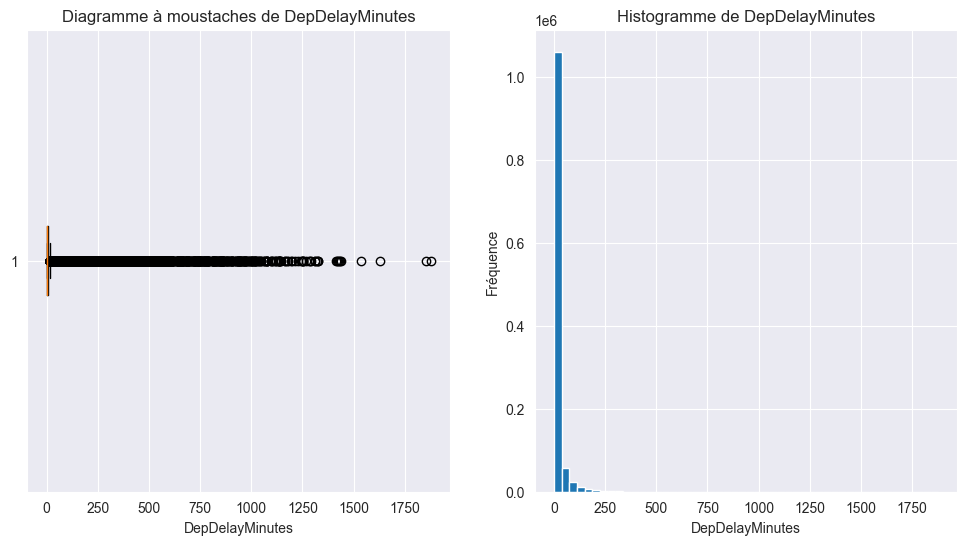

In [ ]:
# Création d'un diagramme à moustaches (box plot)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_filtered["DepDelayMinutes"].dropna(), vert=False)
plt.xlabel("DepDelayMinutes")
plt.title("Diagramme à moustaches de DepDelayMinutes")

# Création d'un histogramme
plt.subplot(1, 2, 2)
plt.hist(df_filtered["DepDelayMinutes"].dropna(), bins=50)
plt.xlabel("DepDelayMinutes")
plt.ylabel("Fréquence")
plt.title("Histogramme de DepDelayMinutes")

# Affichage des graphiques
plt.show()

In [ ]:
df_filtered = df[(df["ArrDelayMinutes"] >= 0)]
stats = df_filtered["ArrDelayMinutes"].describe()

print("Statistiques de ArrDelayMinutes :")
print(f"Nombre de valeurs non nulles : {stats['count']:.0f}")
print(f"Moyenne : {stats['mean']:.2f}")
print(f"Écart type : {stats['std']:.2f}")
print(f"Valeur minimale : {stats['min']:.0f}")
print(f"Premier quartile (Q1) : {stats['25%']:.2f}")
print(f"Médiane (deuxième quartile) : {stats['50%']:.2f}")
print(f"Troisième quartile (Q3) : {stats['75%']:.2f}")
print(f"Valeur maximale : {stats['max']:.0f}")

In [ ]:
# Création d'un diagramme à moustaches (box plot)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_filtered["ArrDelayMinutes"].dropna(), vert=False)
plt.xlabel("ArrDelayMinutes")
plt.title("Diagramme à moustaches de ArrDelayMinutes")

# Création d'un histogramme
plt.subplot(1, 2, 2)
plt.hist(df_filtered["ArrDelayMinutes"].dropna(), bins=50)
plt.xlabel("ArrDelayMinutes")
plt.ylabel("Fréquence")
plt.title("Histogramme de ArrDelayMinutes")

# Affichage des graphiques
plt.show()

In [ ]:
def grubbs_test(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    abs_diffs = np.abs(data - mean)
    max_abs_diff = np.max(abs_diffs)
    max_index = np.argmax(abs_diffs)
    
    G_calculated = max_abs_diff / std_dev
    t = stats.t.ppf(1 - alpha / (2 * n), n - 2)
    G_critical = ((n - 1) * np.sqrt(np.square(t))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t)))
    
    if G_calculated > G_critical:
        print(f"Valeur aberrante détectée : {data[max_index]}")
        data = np.delete(data, max_index)
    else:
        print("Aucune valeur aberrante détectée")
    
    return data

# Exemple d'utilisation
data = np.array(df_filtered["DepDelayMinutes"])
data_without_outliers = grubbs_test(data)

### Nettoyage des valeurs abbérantes
On n'a remarqué que le temps de retard varie concédérablement sur quelques vols et il peut atteindre jusqu'à plus de 31 alors que le 3ème quartile est à 37 minutes. Donc, on a utilisé la transformation pour supprimer ces valeurs abérantes.

In [ ]:
def drop_outliers(df, columns, quantile_min=0.01, quantile_max=0.99, verbose=False):
    df_copy = df.copy()
    total = 0
    quantiles = df_copy.quantile((quantile_min, quantile_max))

    for c in columns:
        to_drop = np.where(np.logical_or(df_copy[c] < quantiles[c][quantile_min],
                                         df_copy[c] > quantiles[c][quantile_max]))[0]

        if verbose:
            print(f"Dropped {len(to_drop)} lines for column {c}.")

        total += len(to_drop)
        df_copy.drop(index=to_drop, inplace=True)
        df_copy.reset_index(inplace=True, drop=True)

    if verbose:
        print(f"Total dropped lines : {total}")

    return df_copy

col = {'DepDelayMinutes','ArrDelayMinutes'}
df = drop_outliers(df, col, verbose=True)

In [ ]:
#df.to_csv('DataFlightFinal.csv', index=False)